<a href="https://colab.research.google.com/github/jackieshen2013/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: When comparing total 311 request counts per community district against the respective population, there seems to be a general trend that the higher the population, the higher the number of 311 requests. However, there is a lot of variance in the data. Maybe narrowing in on specific complaint type categories will help us better understand trends in 311 requests across the city.

"Noise" and "heat and hot water" were the most frequest requests in the entire 311 dataset. Let's try isolating the count of requests in each of those two categories versus all the other complaints.

Step 1. First you will need to prep your data to get the count of complaints in each of the three categories. You can update the code from lecture that gets the total count of 311 requests per CD to instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three seprate dataframes, one per category:

complaint_type = 'Noise - Residential'

complaint_type = 'HEAT/HOT WATER'

Everything else: (complaint_type != 'Noise - Residential' and complaint_type != 'HEAT/HOT WATER')

Step 2. Create a stacked bar chart comprised of three stacked bars. The total height of each bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per CD.

number of 'Noise - Residential' complaints per CD

number of 'HEAT/HOT WATER' complaints per CD

number of other complaints per CD

Step 3. Create a scatter plot of community district's 311 counts per category (y-axis) vs. CD population (x-axis). The scatter plot should show each of the three complaint categories in a different color.


In [0]:
import pandas as pd
from google.colab import drive

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Step 1

In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [37]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:

valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [44]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [45]:
print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [0]:
#Step 2

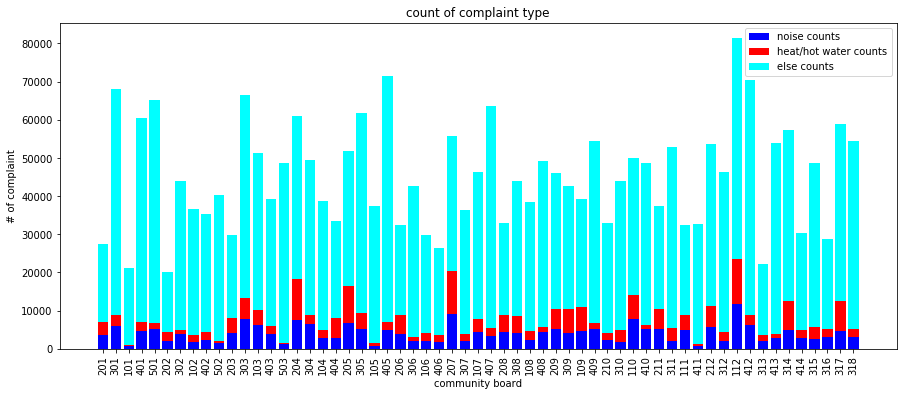

In [53]:
position_on_x = np.arange(len(count_noise))
plt.figure(figsize=(15, 6))

plot1 = plt.bar(
  position_on_x,
  count_noise.count_of_311_requests,
  align='center',
  color='blue',
  label='noise counts')

plot2 = plt.bar(
  position_on_x,
  count_heatwater.count_of_311_requests,
  bottom=np.array(count_noise.count_of_311_requests),
  align='center',
  color='red',
  label='heat/hot water counts')

plot3 = plt.bar(
  position_on_x,
  count_other.count_of_311_requests,
  bottom=np.array(count_heatwater.count_of_311_requests)+np.array(count_noise.count_of_311_requests), 
  align='center',
  color='cyan',
  label='else counts')

plt.xticks(position_on_x, count_noise.borocd, rotation=90)
plt.title('count of complaint type')
plt.xlabel('community board')
plt.ylabel('# of complaint')
plt.legend()
plt.show()

In [0]:
#Step 3

In [70]:
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [0]:
def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [0]:
merged_count_noise = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')
merged_count_heatwater = pd.merge(left=count_heatwater, right=population, left_on='borocd', right_on='borocd')
merged_count_other = pd.merge(left=count_other, right=population, left_on='borocd', right_on='borocd')

In [0]:
merged_count_noise = merged_count_noise[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]
merged_count_heatwater = merged_count_heatwater[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]
merged_count_other = merged_count_other[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]

In [83]:
merged_count_noise.head()


,borocd,Borough,CD Name,2010 Population,count_of_311_requests
0,201,Bronx,"Melrose, Mott Haven, Port Morris",91497,3691
1,301,Brooklyn,"Williamsburg, Greenpoint",173083,5844
2,101,Manhattan,"Battery Park City, Tribeca",60978,722
3,401,Queens,"Astoria, Long Island City",191105,4589
4,501,Staten Island,"Stapleton, Port Richmond",175756,5052


Step 3. Create a scatter plot of community district's 311 counts per category (y-axis) vs. CD population (x-axis). The scatter plot should show each of the three complaint categories in a different color.


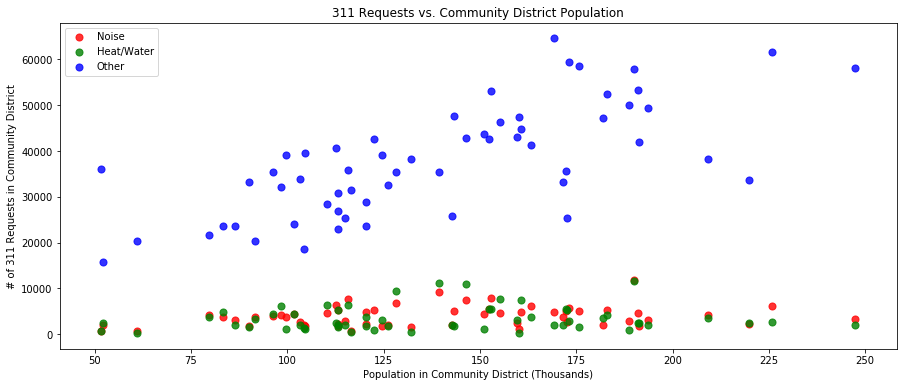

In [88]:

colors = ["red", "green", "blue"]
groups = ["Noise", "Heat/Water", "Other"]

plt.figure(figsize=(15,6))

plt.scatter(
  merged_count_noise['2010 Population']/1000,
  merged_count_noise.count_of_311_requests,
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)

plt.scatter(
  merged_count_heatwater['2010 Population']/1000,
  merged_count_heatwater.count_of_311_requests,
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)

plt.scatter(
  merged_count_other['2010 Population']/1000,
  merged_count_other.count_of_311_requests,
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)
plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

plt.legend(loc=2)
plt.show()


Does it seem like there's a positive correlation between population and noise complaints or population and heat/water complaints? What's a possible explanation for the relationship or lack of relationship?

No the population and noise/heatwater complaints do not seem to be strongly correlated. Heat and hot water are provided by building owners, required by NYC law, so normally when the first few complaints are filed for a building the issue should be resolved faily quickly. Therefore the number of complaints is more likely to be correlated with the number of buildings rather than population. As for noise complaints, community districts with bigger populations might have more sound proof buildings.